In [1]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
start = datetime.datetime(2007, 6, 1)
end = datetime.datetime(2017, 6, 1)

data = data.DataReader('SPY',  'google', start, end)
data =data['Open']
#returns = np.log(data / data.shift(1))

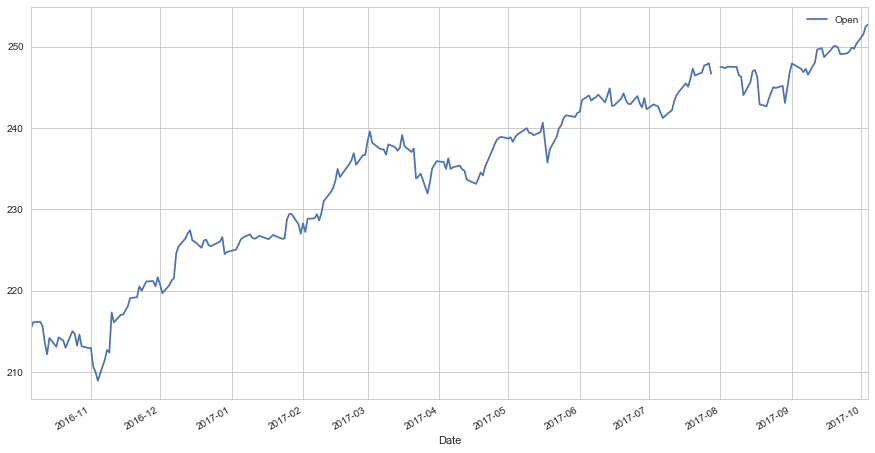

In [3]:
# Let's see a historical view of the closing price
data.plot(legend=True,figsize=(15,8))

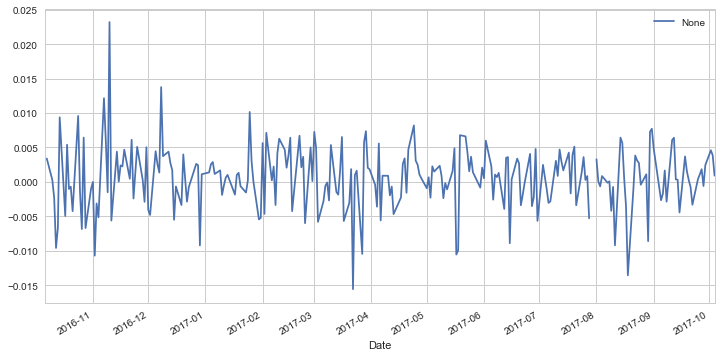

In [4]:
daily_return = data.pct_change()
daily_return.rename(columns={'Open': 'price'}, inplace=True)
daily_return.plot(legend=True, subplots=False,figsize=(12,6))

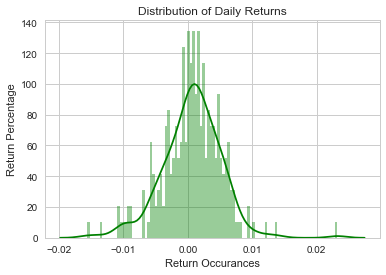

In [5]:
fig=sns.distplot(daily_return.dropna(),bins=100,color='green')
fig.set(xlabel='Return Occurances',ylabel='Return Percentage',title='Distribution of Daily Returns',)

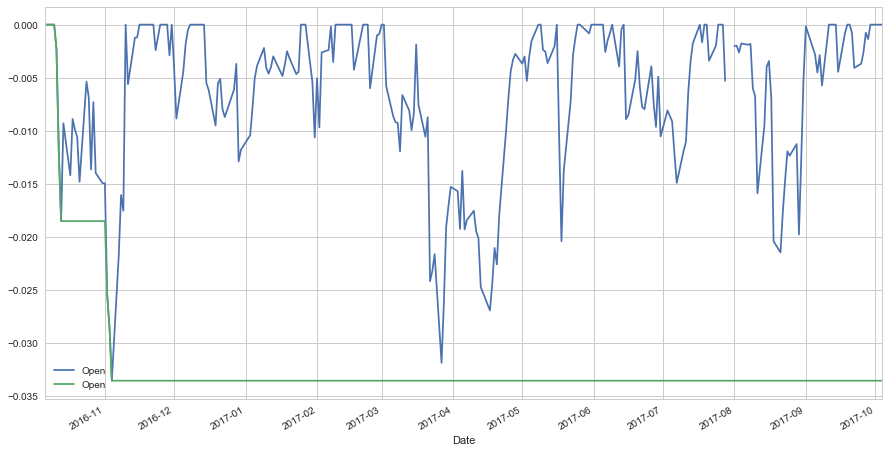

In [6]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = data.rolling(window, min_periods=1).max()
daily_drawdown = data/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot(legend=True,figsize=(15,8))
max_daily_drawdown.plot(legend=True,figsize=(15,8))

# Show the plot
plt.show()

In [7]:
daily_return.head()

Date
2016-10-06         NaN
2016-10-07    0.003390
2016-10-10    0.000278
2016-10-11   -0.002313
2016-10-12   -0.009598
dtype: float64

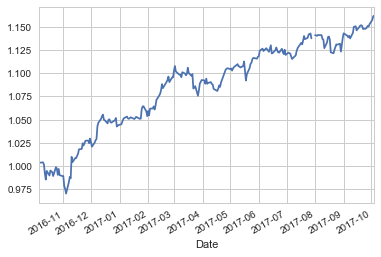

In [8]:
sp500 = daily_return.cumsum() + 1
sp500.plot()

In [9]:
#1) Annualised Return
 
days = (sp500.index[-1] - sp500.index[0]).days
cagr = ((((sp500[-1]) / sp500[1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")

CAGR = 15.95%


In [10]:
# performance.py

def create_drawdowns(sp500):
    """
    Calculate the largest peak-to-trough drawdown of the PnL curve
    as well as the duration of the drawdown. Requires that the 
    pnl_returns is a pandas Series.

    Parameters:
    pnl - A pandas Series representing period percentage returns.

    Returns:
    drawdown, duration - Highest peak-to-trough drawdown and duration.
    """

    # Calculate the cumulative returns curve 
    # and set up the High Water Mark
    # Then create the drawdown and duration series
    hwm = [0]
    eq_idx = sp500.index
    drawdown = pd.Series(index = eq_idx)
    duration = pd.Series(index = eq_idx)

    # Loop over the index range
    for t in range(1, len(eq_idx)):
        cur_hwm = max(hwm[t-1], sp500[t])
        hwm.append(cur_hwm)
        drawdown[t]= hwm[t] - sp500[t]
        duration[t]= 0 if drawdown[t] == 0 else duration[t-1] + 1
    return drawdown.max(), duration.max()

In [11]:
dd = create_drawdowns(sp500)
print(dd)

(0.033773573609949592, 45.0)


Worst Drawdown was 73% and lasted 893 Days

In [12]:
#Calmar Ratio is CAGR / MAXX
cr = .0522 / 0.736
print(cr)

0.07092391304347827


In [29]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [44]:
start = datetime.datetime(2007, 6, 1)
end = datetime.datetime(2017, 6, 1)

tesla = data.DataReader('TSLA',  'google', start, end)
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-06,202.46,204.21,200.21,201.00,4703402
2016-10-07,201.00,201.32,195.80,196.61,3493018
2016-10-10,201.35,204.14,199.66,200.95,3316297
2016-10-11,201.85,202.20,198.31,200.10,2328422
2016-10-12,200.95,203.88,200.42,201.51,1970689


In [45]:
ford = data.DataReader('F',  'google', start, end)
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-06,12.43,12.50,12.33,12.39,25880883
2016-10-07,12.39,12.42,12.20,12.29,22093202
2016-10-10,12.35,12.38,12.10,12.12,24951437
2016-10-11,12.17,12.17,11.91,11.99,40053504
2016-10-12,12.00,12.01,11.94,11.96,20626954


In [46]:
gm = data.DataReader('GM',  'google', start, end)
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-06,32.54,32.64,32.21,32.53,8611216
2016-10-07,32.50,32.60,32.05,32.34,8909389
2016-10-10,32.31,32.60,32.12,32.15,6094808
2016-10-11,32.23,32.28,31.69,31.89,7977527
2016-10-12,31.90,31.99,31.65,31.68,5597571


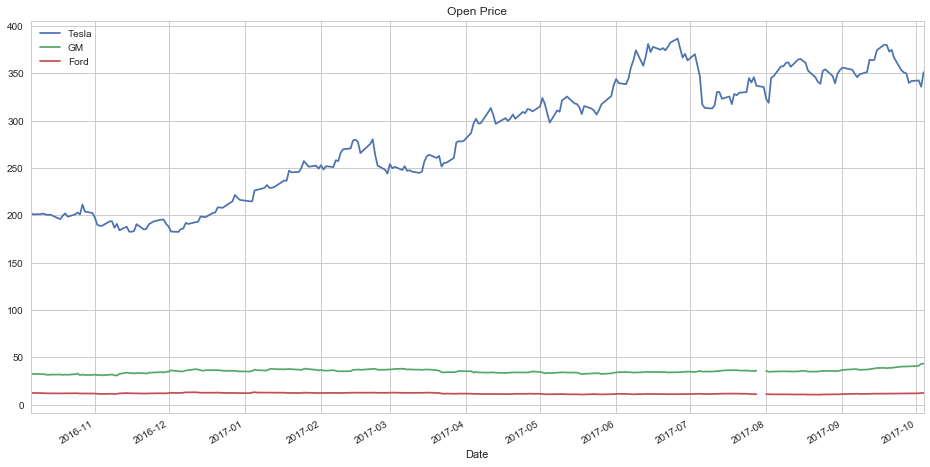

In [47]:
TSLA['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

Plot the Volume of stock traded each day.

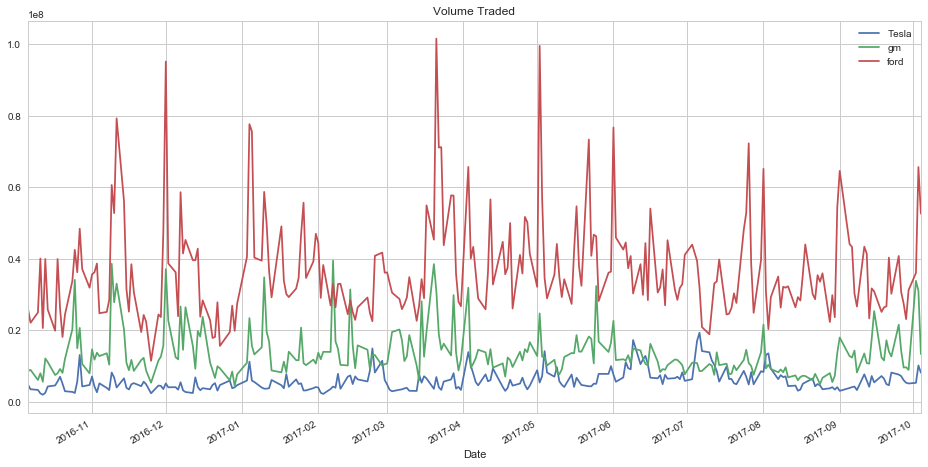

In [48]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

In [49]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

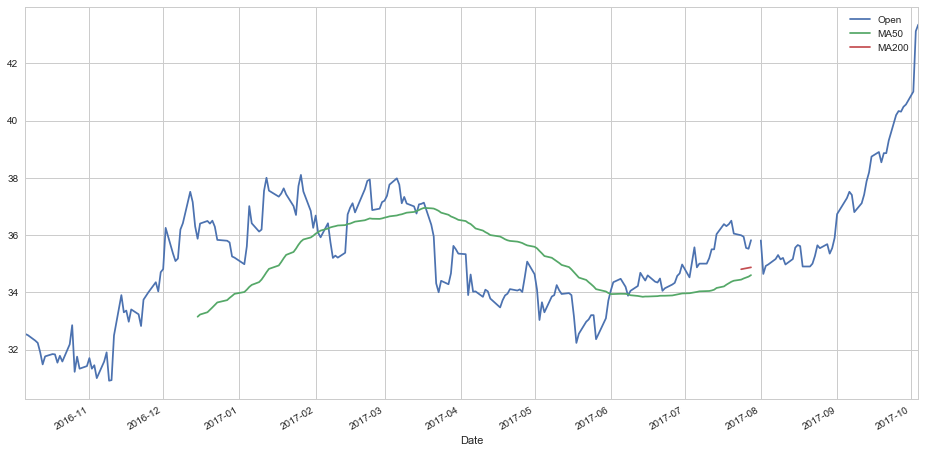

In [50]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

In [53]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [54]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [55]:
# Now repeat for the other dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

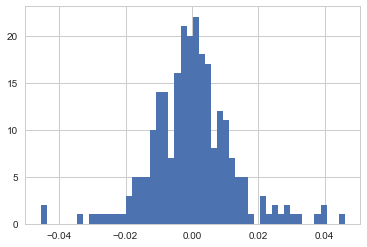

In [56]:
ford['returns'].hist(bins=50)

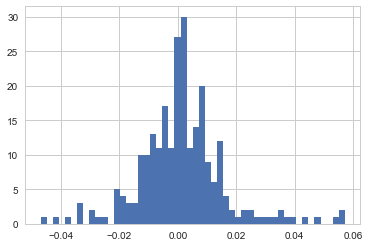

In [57]:
gm['returns'].hist(bins=50)

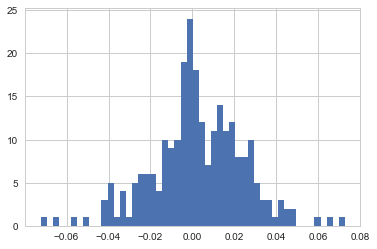

In [58]:
tesla['returns'].hist(bins=50)

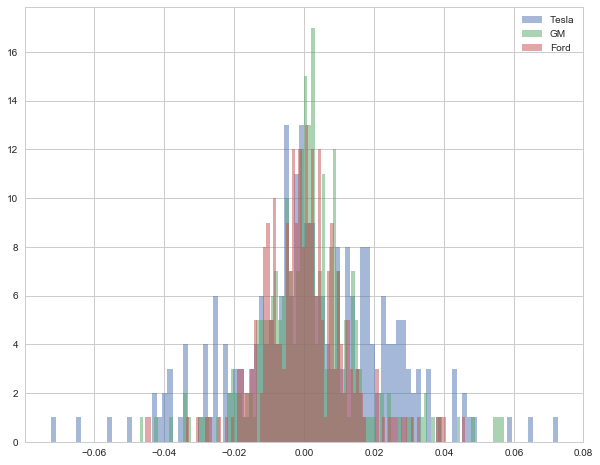

In [60]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

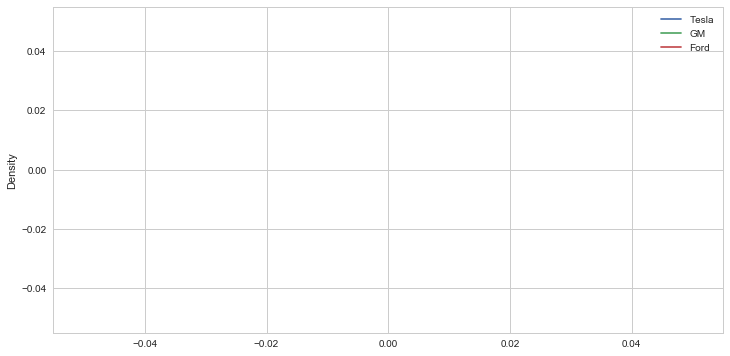

In [61]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

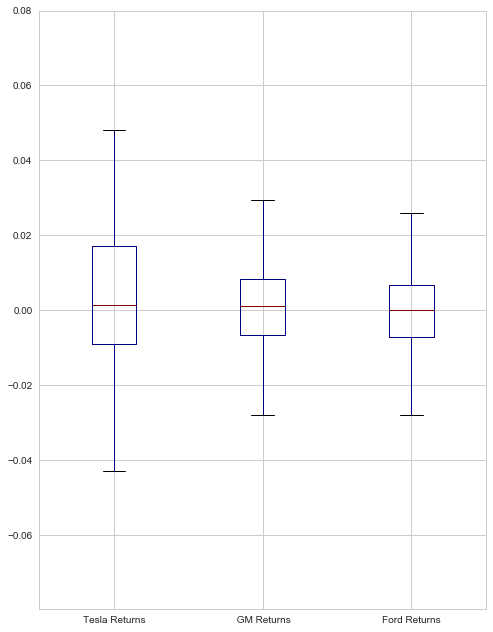

In [62]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

In [65]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [66]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2016-10-06,202.46,204.21,200.21,201.00,4703402,9.522508e+08,NaN,NaN
2016-10-07,201.00,201.32,195.80,196.61,3493018,7.020966e+08,-0.021841,0.978159
2016-10-10,201.35,204.14,199.66,200.95,3316297,6.677364e+08,0.022074,0.999751
2016-10-11,201.85,202.20,198.31,200.10,2328422,4.699920e+08,-0.004230,0.995522
2016-10-12,200.95,203.88,200.42,201.51,1970689,3.960100e+08,0.007046,1.002537


In [67]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

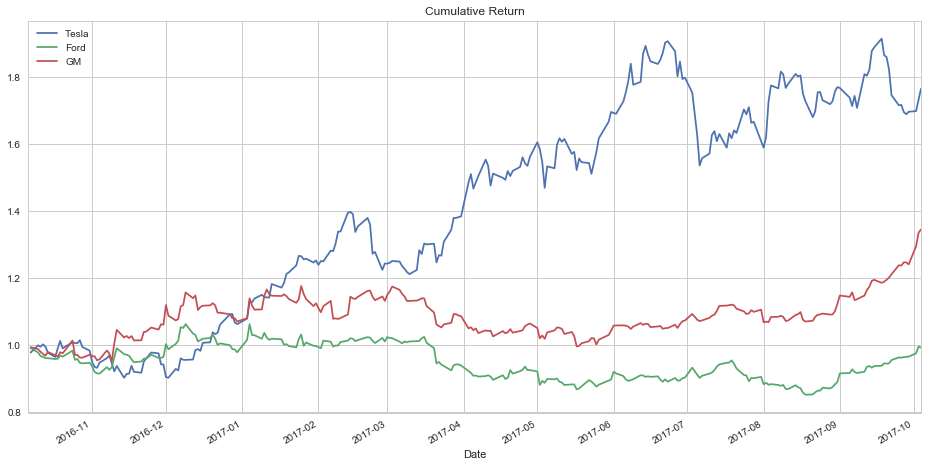

In [68]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

Create a Portfolio Optimization

In [69]:
import pandas as pd
import quandl

In [70]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [71]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [72]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

**Normalize Prices**
This is the same as cumulative daily returns

In [73]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [74]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


**Allocations**
Let's pretend we had the following allocations for our total portfolio:
- 30% in Apple
- 20% in Google/Alphabet
- 40% in Amazon
- 10% in IBM
Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [75]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [76]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


**Investment**
$1,000,000 portfolio

In [77]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

Total Portfolio Value

In [78]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [79]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [81]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [83]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,2.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,2.005992e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,2.007519e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,2.008874e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,2.001869e+06


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

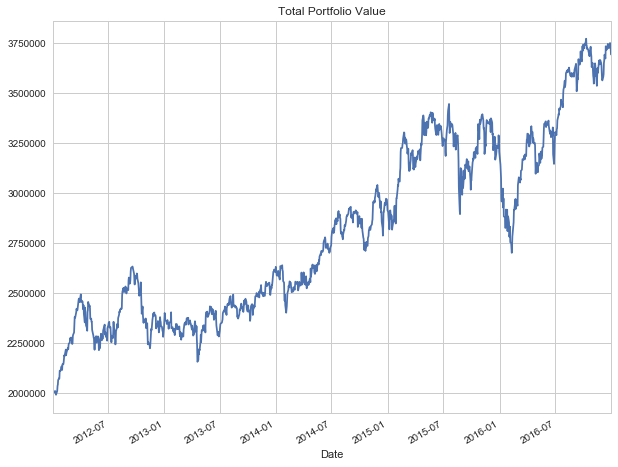

In [85]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

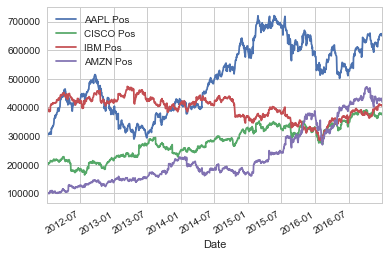

In [86]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [87]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,3.725866e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,3.752050e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,3.736187e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,3.731046e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,3.694857e+06


**Portfolio Stats**
**Daily Returns**

In [89]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

** Cumlative Returns **

In [91]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('return {} was percent!'.format(cum_ret))

return 84.7428518166564 was percent!


**Avg Daily Return**

In [92]:
portfolio_val['Daily Return'].mean()

0.000544233071621529

**Std Daily Return**

In [93]:
portfolio_val['Daily Return'].std()

0.01056828776916188

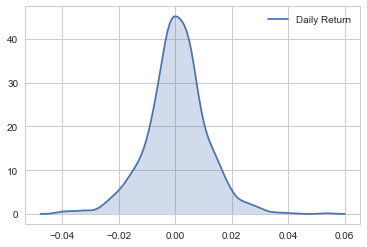

In [95]:
import seaborn as sns
x = portfolio_val['Daily Return']
sns.kdeplot(x, shade=True);

**Sharpe Ratio**

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.
Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return
The original Sharpe Ratio
Annualized Sharpe Ratio = K-value * SR
- K-values for various sampling rates:
- Daily = sqrt(252)
- Weekly = sqrt(52)
- Monthly = sqrt(12)
Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:
daily_rate = ((1.0 + yearly_rate)**(1/252))-1
Other values people use are things like the 3-month treasury bill or LIBOR.

In [96]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.05149680662648057

In [97]:
ASR = (252**0.5)*SR
ASR

0.817486461885904

In [98]:
portfolio_val['Daily Return'].std()

0.01056828776916188

In [99]:
portfolio_val['Daily Return'].mean()

0.000544233071621529

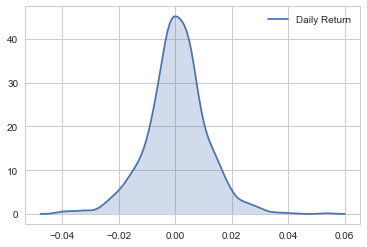

In [101]:
y= portfolio_val['Daily Return']
sns.kdeplot(y, shade=True);

**Portfolio Optimization**

**Monte Carlo Simulation for Optimization Search**

Randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# Download and get Daily Returns
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [107]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [108]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,159.151010,179.03
2012-01-04,53.132802,15.919125,158.501763,177.51
2012-01-05,53.722681,15.860445,157.750003,177.61
2012-01-06,54.284287,15.801764,155.938944,182.61
2012-01-09,54.198183,15.902359,155.127385,178.56


In [109]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [110]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


**Simulating **

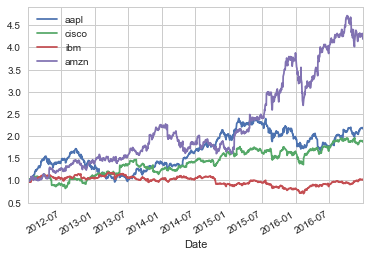

In [111]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [112]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


switch over to using log returns instead of arithmetic returns

In [113]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


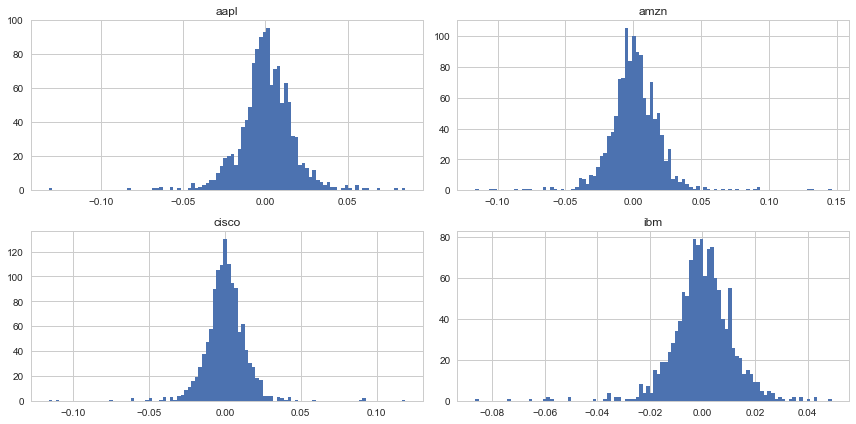

In [114]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [115]:
log_ret.describe().transpose()

C:\Users\alexb\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,NaN,NaN,NaN,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,NaN,NaN,NaN,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,NaN,NaN,NaN,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,NaN,NaN,NaN,0.146225


In [116]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [117]:
# Compute pairwise covariance of columns
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [118]:
log_ret.cov()*252 # multiply by days

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


**Single Run for Some Random Allocation**

In [119]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[ 0.51639863  0.57066759  0.02847423  0.17152166]


Rebalance to sum to 1.0
[ 0.40122278  0.44338777  0.02212343  0.13326603]


Expected Portfolio Return
0.15599272049632532


Expected Volatility
0.185026495659


Sharpe Ratio
0.843083148393


In [120]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [121]:
sharpe_arr.max()

1.0303260551271307

In [122]:
sharpe_arr.argmax()

1419

In [123]:
all_weights[1419,:]

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

In [124]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

**Plotting the data**

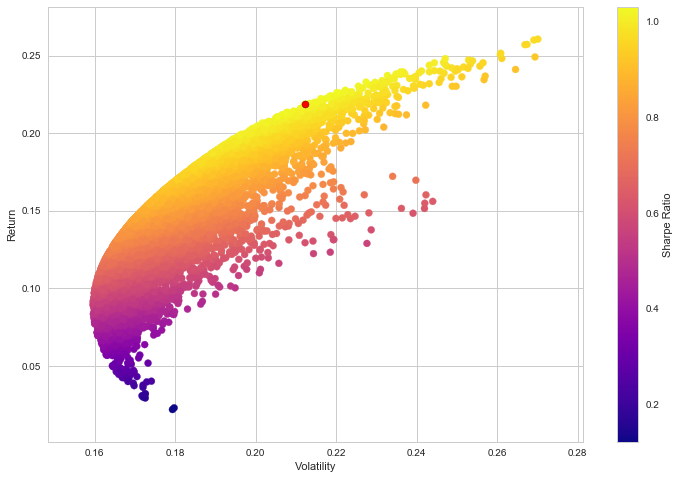

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

**Mathematical Optimization**

**Functionalize Return and SR operations**

In [128]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [129]:
from scipy.optimize import minimize

maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [130]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [131]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [132]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [133]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [134]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [135]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [136]:
opt_results

     fun: -1.030716870336033
     jac: array([  5.64008951e-05,   4.18275595e-05,   3.39921698e-01,
        -4.45097685e-05,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  2.66289765e-01,   2.04189822e-01,   1.66086220e-17,
         5.29520413e-01])

In [137]:
opt_results.x

array([  2.66289765e-01,   2.04189822e-01,   1.66086220e-17,
         5.29520413e-01])

In [138]:
get_ret_vol_sr(opt_results.x)

array([ 0.21885916,  0.21233683,  1.03071687])

**All Optimal Portfolios (Efficient Frontier)**

In [140]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) 

In [141]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [142]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

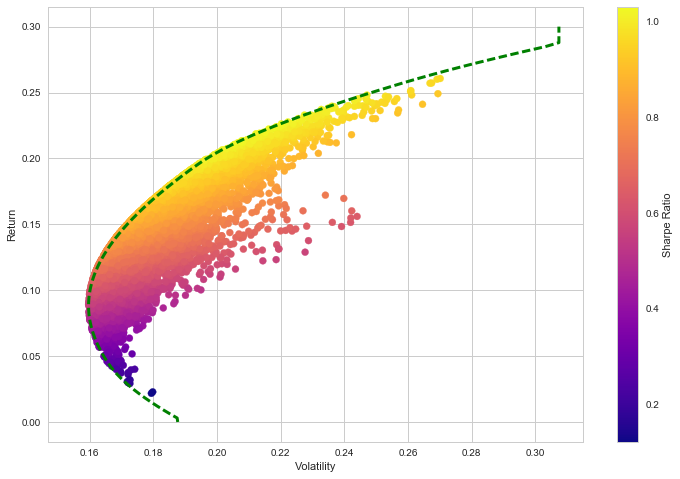

In [143]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

Hedging

In [151]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
from statsmodels import regression
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [152]:
start = datetime.datetime(2007, 6, 1)
end = datetime.datetime(2017, 6, 1)

asset = data.DataReader('AAPL',  'google', start, end)
benchmark = data.DataReader('SPY',  'google', start, end)

In [153]:
asset_ret = asset.pct_change()[1:]
bench_ret = benchmark.pct_change()[1:]

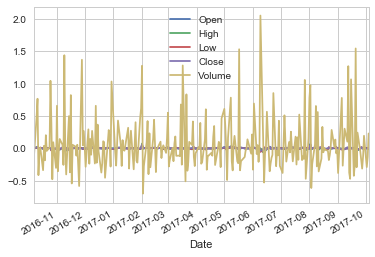

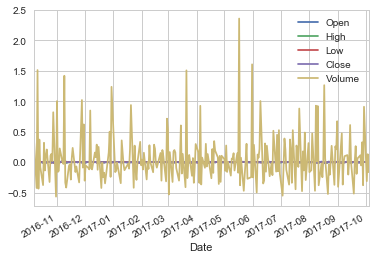

In [154]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

Regression for Alpha and Beta Values

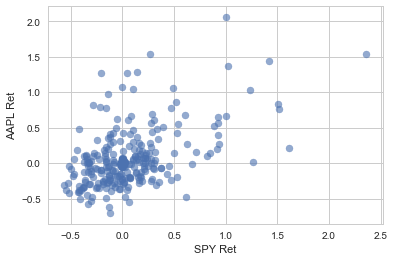

In [155]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

In [160]:
AAPL = asset_ret.values
spy = bench_ret.values
beta = 1.02
alpha = 1.67

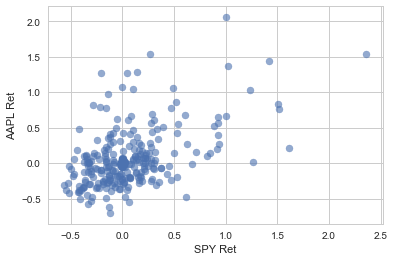

In [161]:
# Scatter Returns
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)

# Fit Line
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta + alpha

plt.plot(spy_line,y,'r')

plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')

hedging

In [174]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 320)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format
from scipy.stats import norm
import matplotlib.pyplot as plt

def BlackScholes(tau, S, K, sigma):
    d1=np.log(S/K)/sigma/np.sqrt(tau)+0.5*sigma*np.sqrt(tau)
    d2=d1-sigma*np.sqrt(tau)
    npv=(S*norm.cdf(d1)-K*norm.cdf(d2))
    delta=norm.cdf(d1)
    gamma=norm.pdf(d1)/(S*sigma*np.sqrt(tau))
    vega=S*norm.pdf(d1)*np.sqrt(tau)
    theta=-.5*S*norm.pdf(d1)*sigma/np.sqrt(tau)
    return {'npv':npv,'delta':delta,'gamma':gamma,'vega':vega,'theta':theta}

class Call(object):
    def __init__(self,start,T,K,N):
        self.T=T
        self.K=K
        self.start=start  #day to sell   option
        self.N=N

    def calc(self,today,vol,S):
        if today<self.start:
            return {'delta':0,'npv':0,'vega':0,'gamma':0,'theta':0,'intrinsic':0}
        if today>self.T:
            return {'delta':0,'npv':0,'vega':0,'gamma':0,'theta':0,'intrinsic':0}
        if today==self.T:
            return {'delta':0,'npv':0,'vega':0,'gamma':0,'theta':0,'intrinsic':self.N*max(0,S-self.K)}
        tau=(self.T-today)/250.
        call=BlackScholes(tau, S, self.K, vol)
        return {'delta':self.N*call['delta'],'npv':self.N*call['npv'],'vega':self.N*call['vega'],'gamma':self.N*call['gamma'],'theta':self.N*call['theta'],'intrinsic':self.N*max(0,S-self.K)}

def deltahedge(Ndays,Sdynamics="S*=(1.0+vol*np.sqrt(dt)*np.random.randn())",volDynamics="vol=.30"):
    S=90.0
    Strike=100.0
    vol=.30
    columns=('spot','vol','shares','cash','option','npv','vega','gamma','theta','pnlPredict')
    df = pd.DataFrame([[S,vol,0,0,0,0,0,0,0,0]],columns=columns)
    dt=1/250.
    cash=0
    dayToSellCall=1
    maturityCall=Ndays-1
    call=Call(dayToSellCall,maturityCall,Strike,-10)# sell one call on dayToSellCall day
    for day in xrange(1,Ndays+1):
        exec Sdynamics
        exec volDynamics

        if day==dayToSellCall: #sell call
          callValue=call.calc(day,vol,S)
          cash-=callValue['npv']

        #delta hedge
        callValue=call.calc(day,vol,S)
        delta=callValue['delta']
        currentNumberShares=df.iloc[day-1].shares
        sharesBuy=-currentNumberShares-delta
        cash-=sharesBuy*S
        if day==maturityCall:
            cash+=call.calc(day,vol,S)['intrinsic'] #settle call

        gamma=callValue['gamma']
        theta=callValue['theta']
        dS=S-df.iloc[day-1].spot
        pnlPredict=0.5*gamma*dS*dS+theta*dt
        dfnew=pd.DataFrame([[S,vol,-delta,cash,-callValue['npv'],cash+callValue['npv']-delta*S,callValue['vega'],gamma,theta/250.,pnlPredict]],columns=columns)
        df=df.append(dfnew,ignore_index=True)

    df['pnl'] = df['npv'] - df['npv'].shift(1)
    df['vol']=100.0*df['vol']
    df['error']=df['pnl']-df['pnlPredict']
    df.set_value(dayToSellCall, "error", 0)
    #df.loc[:,['vol','spot']].plot(title='Spot and implied Volatility')
    df.loc[:,['npv','spot','option']].plot(title='-Call+delta*S+cash vs Spot {0} {1}'.format(Sdynamics,volDynamics))
    df.loc[:,['theta']].plot(title='Theta {0} {1}'.format(Sdynamics,volDynamics))
    df.loc[:,['pnl']].hist(bins=50)
    #df.loc[:,['error']].hist(bins=50)
    print df.loc[:,['pnl']].describe()
    #print df

deltahedge(1000)#constant vol
deltahedge(1000,volDynamics="vol*=(1.0+0.5*np.sqrt(dt)*np.random.randn())")#stochastic vol
deltahedge(1000,Sdynamics="S=90") #consant OTM
deltahedge(10000,Sdynamics="S=100") #consant ATM
deltahedge(10000,Sdynamics="S=110")#consant ITM
deltahedge(10000,Sdynamics="S+=S*dt") #growing stock
plt.show()

SyntaxError: Missing parentheses in call to 'exec' (<ipython-input-174-0045922946c4>, line 49)